In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
import os

%matplotlib inline

In [2]:
adult_path = os.path.join(mglearn.datasets.DATA_PATH, "adult.data")
adult_path

'/Users/franklinaryee/miniforge3/envs/intro-ml/lib/python3.11/site-packages/mglearn/data/adult.data'

In [3]:
names = [
    "age",
    "workclass",
    "fnlwgt",
    "education",
    "education-num",
    "marital-status",
    "occupation",
    "relationship",
    "race",
    "gender",
    "capital-gain",
    "capital-loss",
    "hours-per-week",
    "native-country",
    "income",
]

In [4]:
data = pd.read_csv(
    adult_path,
    index_col=False,
    names=names
)

In [5]:
data = data[
    [
        "age",
        "workclass",
        "education",
        "gender",
        "hours-per-week",
        "occupation",
        "income",
    ]
]

In [6]:
data.head()

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [7]:
for col in data.columns:
    print(data[col].value_counts(), "\n")

age
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: count, Length: 73, dtype: int64 

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64 

education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64 

gender
Male      21790
Female    10771
Name: count, dtype: int64 

hours-per-week
40    15217
50     2819
45     1824
60     1475
35     1297
      ...  
82        1
92        1
87    

In [8]:
data.columns.tolist()

['age',
 'workclass',
 'education',
 'gender',
 'hours-per-week',
 'occupation',
 'income']

In [9]:
data_dummies = pd.get_dummies(data)
data_dummies.columns.tolist()

['age',
 'hours-per-week',
 'workclass_ ?',
 'workclass_ Federal-gov',
 'workclass_ Local-gov',
 'workclass_ Never-worked',
 'workclass_ Private',
 'workclass_ Self-emp-inc',
 'workclass_ Self-emp-not-inc',
 'workclass_ State-gov',
 'workclass_ Without-pay',
 'education_ 10th',
 'education_ 11th',
 'education_ 12th',
 'education_ 1st-4th',
 'education_ 5th-6th',
 'education_ 7th-8th',
 'education_ 9th',
 'education_ Assoc-acdm',
 'education_ Assoc-voc',
 'education_ Bachelors',
 'education_ Doctorate',
 'education_ HS-grad',
 'education_ Masters',
 'education_ Preschool',
 'education_ Prof-school',
 'education_ Some-college',
 'gender_ Female',
 'gender_ Male',
 'occupation_ ?',
 'occupation_ Adm-clerical',
 'occupation_ Armed-Forces',
 'occupation_ Craft-repair',
 'occupation_ Exec-managerial',
 'occupation_ Farming-fishing',
 'occupation_ Handlers-cleaners',
 'occupation_ Machine-op-inspct',
 'occupation_ Other-service',
 'occupation_ Priv-house-serv',
 'occupation_ Prof-specialty',


In [10]:
features = data_dummies.loc[:, 'age':'occupation_ Transport-moving']
# Extract numpy arrays
X = features.values


In [11]:
# target
y = data_dummies['income_ >50K'].values

In [12]:
print(f"X.shape: {X.shape}\ny.shape: {y.shape}")

X.shape: (32561, 44)
y.shape: (32561,)


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg =LogisticRegression(max_iter=2_000)
logreg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,2000
,multi_class,'deprecated'


In [14]:
print(logreg.score(X_train, y_train))
print(logreg.score(X_test, y_test))

0.8136773136773137
0.8092371944478566


In [15]:
demo_df = pd.DataFrame(
    {
        'Integer Feature': [0, 1, 2, 1],
        'Categorical Feature': ['socks', 'fox', 'socks', 'box']
    }
)
demo_df

,Integer Feature,Categorical Feature
0,0,socks
1,1,fox
2,2,socks
3,1,box


In [16]:
pd.get_dummies(demo_df)

,Integer Feature,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,0,False,False,True
1,1,False,True,False
2,2,False,False,True
3,1,True,False,False


In [17]:
demo_df['Integer Feature'] = demo_df['Integer Feature'].astype(str)

In [18]:
pd.get_dummies(demo_df).columns.tolist()

['Integer Feature_0',
 'Integer Feature_1',
 'Integer Feature_2',
 'Categorical Feature_box',
 'Categorical Feature_fox',
 'Categorical Feature_socks']

In [19]:
demo_df2 = pd.DataFrame(
    {
        'Integer Feature': [0, 1, 2, 1],
        'Categorical Feature': ['socks', 'fox', 'socks', 'box']
    }
)
demo_df2

,Integer Feature,Categorical Feature
0,0,socks
1,1,fox
2,2,socks
3,1,box


In [20]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
encoder.fit_transform(demo_df2)
encoder.get_feature_names_out().tolist()

['Integer Feature_0',
 'Integer Feature_1',
 'Integer Feature_2',
 'Categorical Feature_box',
 'Categorical Feature_fox',
 'Categorical Feature_socks']

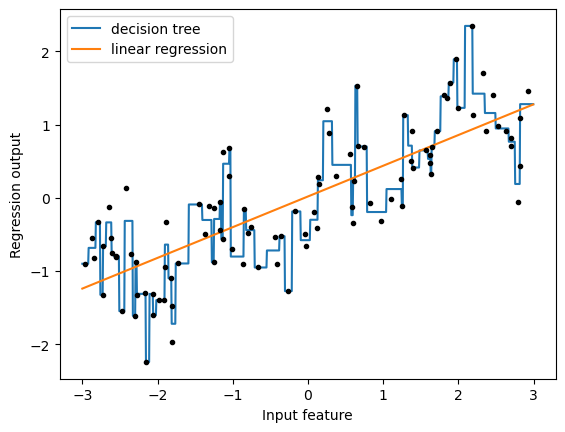

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

dreg = DecisionTreeRegressor(min_samples_split=3).fit(X, y)
plt.plot(line, dreg.predict(line), label="decision tree")

lreg = LinearRegression().fit(X, y)
plt.plot(line, lreg.predict(line), label="linear regression")

plt.plot(X[:, 0], y, '.', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

In [22]:
bins = np.linspace(-3, 3, 11)
bins

array([-3. , -2.4, -1.8, -1.2, -0.6,  0. ,  0.6,  1.2,  1.8,  2.4,  3. ])

In [23]:
which_bin = np.digitize(X, bins=bins)
print(f"Data points:\n{X[:5]}")
print("Bin membership for data points\n", which_bin[:5])

Data points:
[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
Bin membership for data points
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


In [24]:
encoder = OneHotEncoder(sparse_output=False)
encoder.fit_transform(which_bin)
encoder.get_feature_names_out()

array(['x0_1', 'x0_2', 'x0_3', 'x0_4', 'x0_5', 'x0_6', 'x0_7', 'x0_8', 'x0_9',
       'x0_10'], dtype=object)

In [25]:

X_binned = encoder.fit_transform(which_bin)
print(X_binned[:15])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [26]:
X_binned.shape

(100, 10)

In [27]:
line_binned = encoder.transform(np.digitize(line, bins=bins))

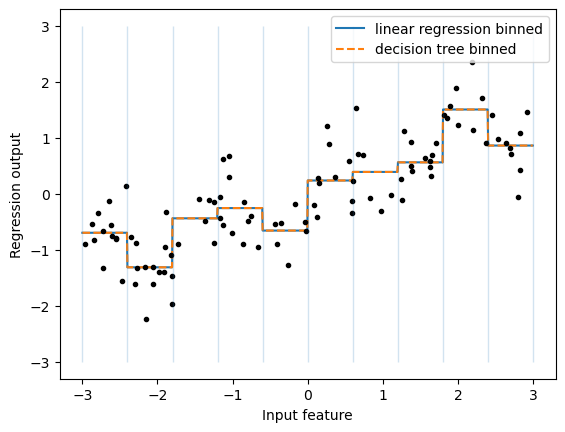

In [28]:
lreg = LinearRegression().fit(X_binned, y)
plt.plot(line, lreg.predict(line_binned), label="linear regression binned")

dreg = DecisionTreeRegressor().fit(X_binned, y)
plt.plot(line, dreg.predict(line_binned), label='decision tree binned', linestyle='--')

plt.plot(X[:, 0], y, '.', c='k')
plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature");

In [30]:
X_combined = np.hstack([X, X_binned])
X_combined.shape

(100, 11)

In [31]:
X.shape

(100, 1)

In [33]:
X_binned.shape

(100, 10)

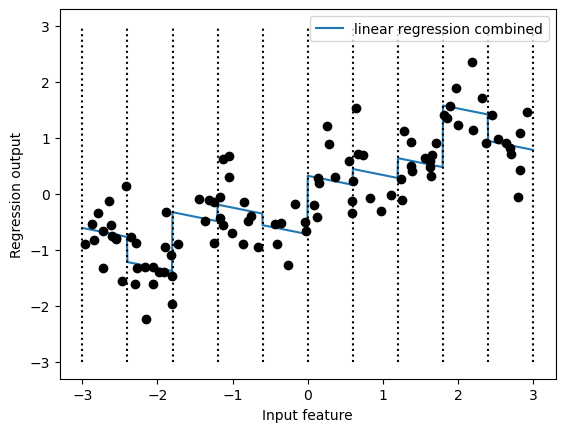

In [55]:
reg = LinearRegression().fit(X_combined, y)

line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label='linear regression combined')

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k')

plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.plot(X[:, 0], y, 'o', c='k')

In [56]:
X_product = np.hstack([X_binned, X*X_binned])
X_product.shape

(100, 20)

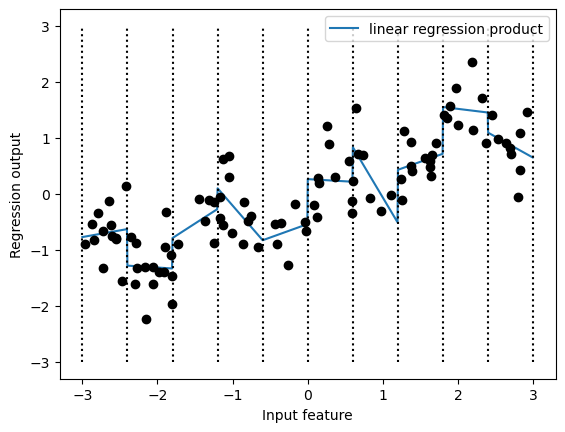

In [61]:
reg = LinearRegression().fit(X_product, y)
line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), label='linear regression product')

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k')

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

In [66]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)

In [67]:
X_poly.shape

(100, 10)

In [71]:
poly.get_feature_names_out()

array(['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9',
       'x0^10'], dtype=object)

In [72]:
poly

,degree,10
,interaction_only,False
,include_bias,False
,order,'C'


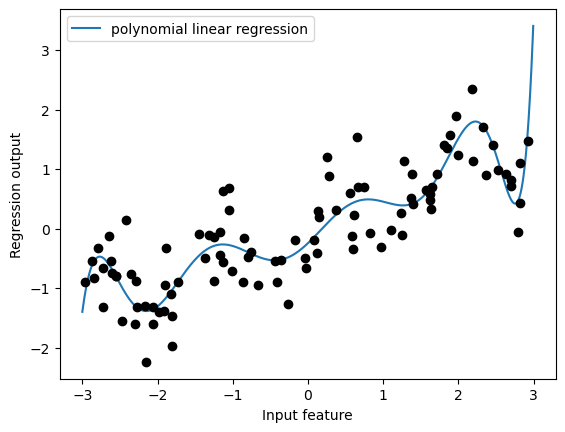

In [76]:
reg = LinearRegression().fit(X_poly, y)

line_poly = poly.transform(line)

plt.plot(line, reg.predict(line_poly), label='polynomial linear regression')
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best");

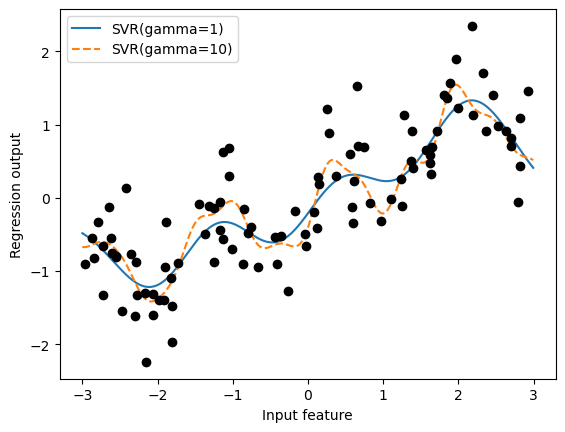

In [79]:
from sklearn.svm import SVR

for gamma, linetype in zip([1, 10], ['-', '--']):
    svr = SVR(gamma=gamma).fit(X, y)
    plt.plot(line, svr.predict(line), linetype, label=f"SVR(gamma={gamma})")

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")